Spend any amount of time studying statistics or machine learning and you're bound to come across the phrase the "curse of dimensionality". In my studies, I've come into contact with this concept many times before, but I've never really bothered to look into it beyond the underlying notion that as the number of features in your dataset increases, the more trouble you're likely to run into. However, as I'm working my way through the fanstastic book, "Introduction to Statistical Learning with Applications in R" (or ISLR for short), and accompanying lectures, my interest in the topic was piqued. 

In the class lectures on regression models, the instructors give an example of a model that makes use of the mean value of a set of neighboring data points to predict the value for a given input. This works quite well in a scenario like we see in the image below, with only one input and one output, but once the number of dimensions grows, they argue that each point becomes so distant that the mean value no longer makes sense. In an attempt to gain a more intuitive understanding of this idea I came up with a simple experiment that I detail in the remaining text below and I hope it helps cement the concept for you as well.

NOTE: Add an image here that shows a set of points and the predictions (i.e., the line) for each x-axis value based on a kNN regression model.

## The Curse of Dimensionality

The phrase the "[curse][wikipedia] [of][dummies] [dimensionality][kdnuggets]" refers to various phenomena that arise when analyzing data in high-dimensional spaces, but key to them all is the fact that as the number of dimensions grow, the volume of the data space grows so quickly (exponentially) that the available data becomes sparse. This causes obvious problems in an algorithm that relies on finding a suitable set of "neighbors" that should all be somewhat similar to one another, since as the distance grows between datapoints, so too does the dissimilarity between them. The solution to this problem is to use a parametric method instead.

*Parametric methods* assume that the data follows a specific shape and so, rather than estimating $f$, we assume a model and then estimate the values for the parameters of that model. As an example, one common parametric method is linear regression. In linear regression, we assume that our data generally follow a linear shape, and so we need only estimate the coefficients and intercept of the underlying linear model.

In this section I work through a demonstration of the "curse of dimensionality" that helped to solidify the concept in my mind. In this example, I generate a multi-dimensional dataset (where $p$ is the number of dimensions) from a set of uniformly distributed random values. I then calculate the average Euclidian distance between each data point and the origin looking only at $k$ dimensions at a time (where $k = \{1, 2, ..., p - 1, p\}$) and plot the average distance for each $k$. If the "curse" exists, then we should see the average distance grow as the number of dimensions increases.

To begin, we'll need a pair of helper functions for calculating the Euclidan distance between two n-dimensional data points and the average distance between each point in a dataset and the origin. 

[regression]: https://en.wikipedia.org/wiki/Regression_analysis
[wikipedia]: https://en.wikipedia.org/wiki/Curse_of_dimensionality
[dummies]: http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/
[kdnuggets]: http://www.kdnuggets.com/2017/04/must-know-curse-dimensionality.html

In [91]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Suppress all warnings just to keep the notebook nice and clean. 
# This must happen after all imports since numpy actually adds its
# RankWarning class back in.
import warnings
warnings.filterwarnings("ignore")

# Setup the look and feel of the notebook
sns.set_context("notebook", 
                font_scale=1.5)
sns.set_style('whitegrid')
sns.set_palette('deep')

%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (9.0, 7.0)

In [2]:
from math import sqrt
from functools import partial

def dist(v1, v2):
    """Calculates the Euclidian distance between two vectors.
    
    Argumentss:
      v1 -- first vector
      v2 -- second vector
    
    Returns:
      The Euclidan distance between the two given vectors.

    """
    return abs(sqrt(sum(v1 - v2)**2))

def avg_dist(data):
    """Calculates the average distance for the given dataset.
    
    Calculate the average Euclidian distance of all points in
    the dataset from the origin.
    
    Arguments:
      data -- n-dimensional dataframe.
    
    Returns:
      The average euclidan distance for the given dataset.

    """
    p = data.shape[1]
    return np.mean(data.apply(dist, axis=1, args=(np.zeros(p),)))

Then, in the following code snippet, we put the "curse of dimensionality" to the test. Our test datset is a multi-dimensional matrix, within which each feature vector is a collection of uniformly distribute random values between -1 and 1. We then calculate the average distance between each observation and the origin and plot the results.

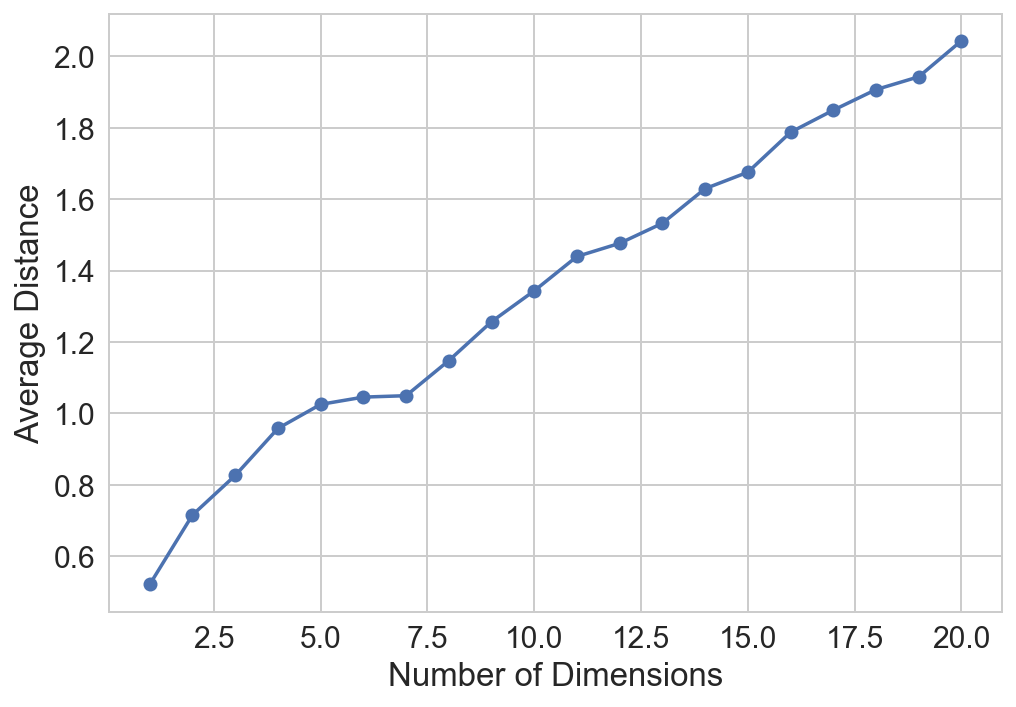

In [3]:
p = 20
n = 200
df = pd.DataFrame(np.random.uniform(-1, 1, p) for i in range(n))

x = range(1, p + 1)
y = [avg_dist(df.iloc[:,:i]) for i in x]

plt.plot(x, y, 'o-')
plt.xlabel('Number of Dimensions')
plt.ylabel('Average Distance');

In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

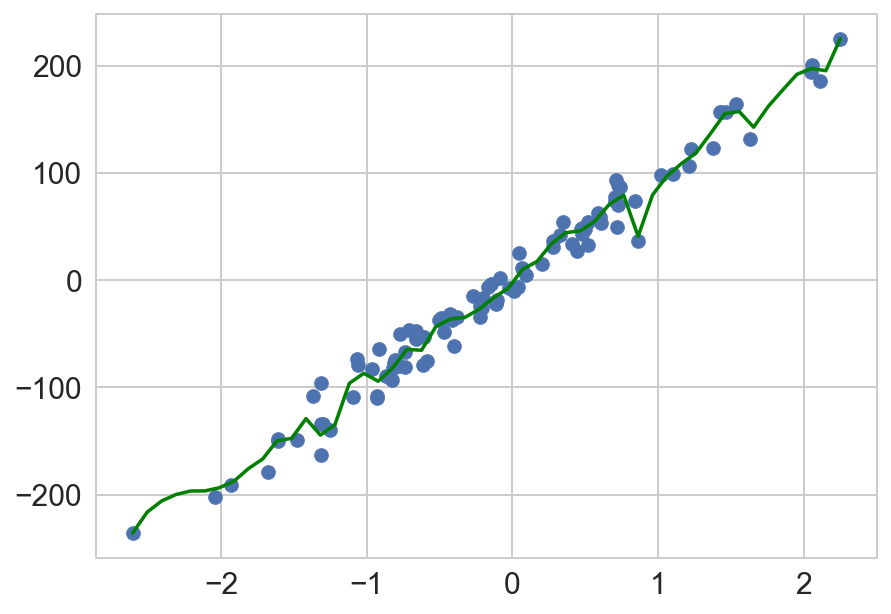

In [89]:
x, y = datasets.make_regression(100, 1, noise=16)

knn = KNeighborsRegressor(5, weights='distance')
T = np.reshape(np.linspace(np.min(x), np.max(x)), (-1, 1))
y_ = knn.fit(x, y).predict(T)

plt.scatter(x, y)
plt.plot(T, y_, c='g', label='prediction');

## Real World Example

The example below could be used in place of the contrived example above. Rather than generating some fake random data, it uses data from the Boston Housing data.

In [80]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

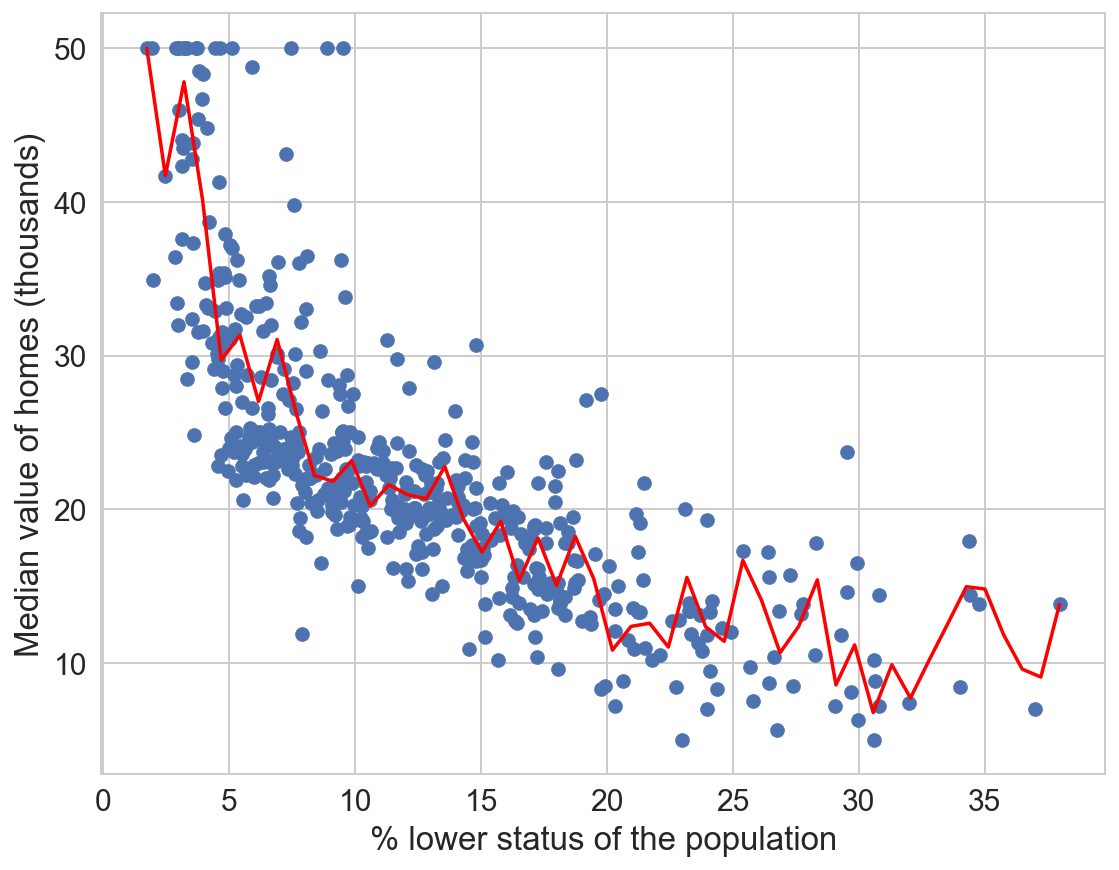

In [92]:
x, y = np.reshape(df['LSTAT'], (-1, 1)), np.reshape(df['MEDV'], (-1, 1))

# Fit a kNN regressor and make some predictions
knn = KNeighborsRegressor(3, weights='distance')
T = np.reshape(np.linspace(np.min(x), np.max(x)), (-1, 1))
y_ = knn.fit(x, y).predict(T)

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(T, y_, c='r', label='prediction')
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of homes (thousands)');

# Example Using scikit-learn

The scikit-learn library comes with a neighbor-based regression model called `KNeighborsRegressor` that we can use...

In addition, the library also comes with a handy function for creating test datasets for regression algorithms. We'll be using that function to create a handful 

In [9]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [10]:
feature_space = np.unique(np.logspace(0, 2, 20).astype(int))
sample_space = np.logspace(3, 4, len(feature_space)).astype(int)
lm_scores = []
km_scores = []
for n_features, n_samples in zip(feature_space, sample_space):
    X, y = make_regression(n_samples, n_features, noise=10)
    
    lm = LinearRegression()
    lm_scores.append(cross_val_score(lm, X, y).mean())
    
    km = KNeighborsRegressor()    
    km_scores.append(cross_val_score(km, X, y).mean()) 

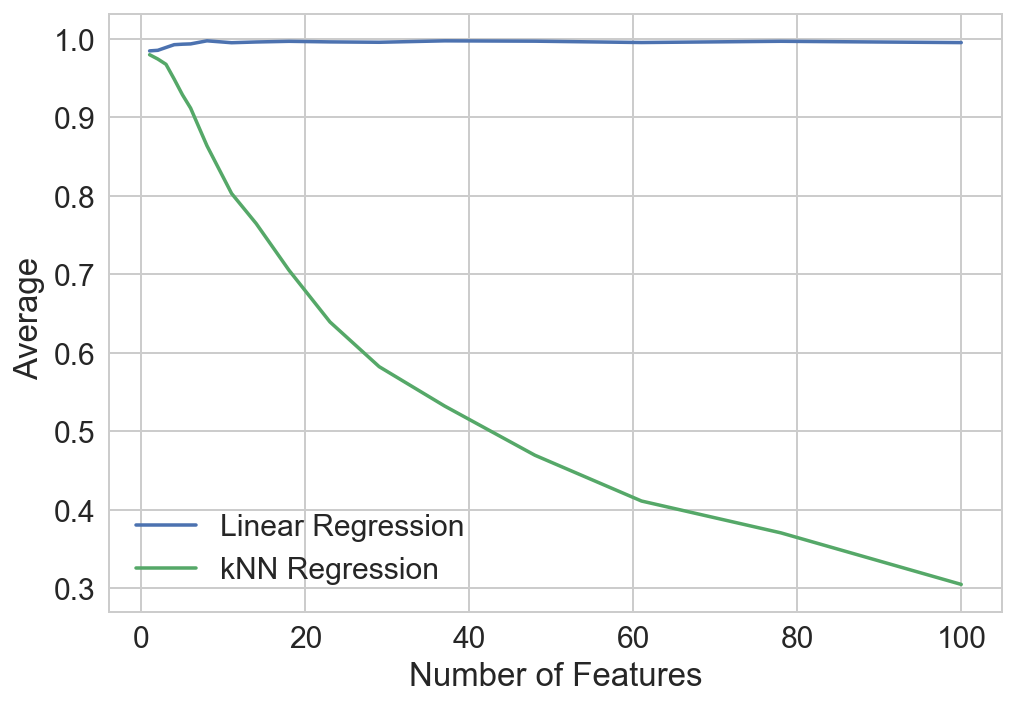

In [11]:
plt.plot(feature_space, lm_scores, label='Linear Regression') 
plt.plot(feature_space, km_scores, label='kNN Regression')
plt.xlabel('Number of Features')
plt.ylabel('Average ')
plt.legend();

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
feature_space = np.unique(np.logspace(0, 2, 20).astype(int))
sample_space = np.logspace(3, 4, len(feature_space)).astype(int)
lm_scores = []
km_scores = []
for n_features, n_samples in zip(feature_space, sample_space):
    X, y = make_regression(n_samples, n_features, noise=10)
    X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.7)
    
    lm = LinearRegression()
    lm.fit(X1, y1)
    lm_scores.append(lm.score(X2, y2))
    
    km = KNeighborsRegressor()
    km.fit(X1, y1)
    km_scores.append(km.score(X2, y2))

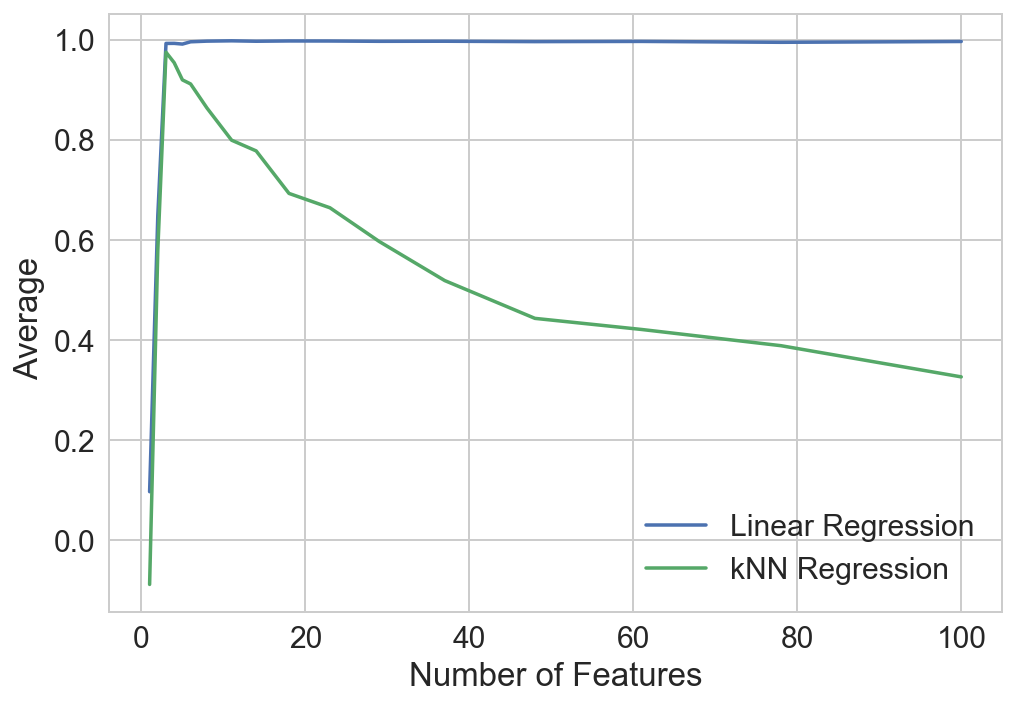

In [14]:
plt.plot(feature_space, lm_scores, label='Linear Regression') 
plt.plot(feature_space, km_scores, label='kNN Regression')
plt.xlabel('Number of Features')
plt.ylabel('Average ')
plt.legend();

In [3]:
X, y = datasets.make_regression(100, 1, noise=10)

NameError: name 'datasets' is not defined

In [25]:
km = KNeighborsRegressor()  
km.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [2]:
from bisect import bisect

class KnnMeanRegressor(object):
    def __init__(self, X, y, k=5):
        # We need to sort both lists by the x values to make it faster and
        # easier to find the k nearest neighbors when calculating the mean.
        self.X, self.y = zip(*sorted(zip(X[:,0], y)))
        self.k = k
        
    def __call__(self, x):
        n = len(self.X)
        idx = bisect(self.X, x)
        idx_left = idx - 1 if idx > 0 else 0
        idx_right = idx if idx < n-1 else n-1
        neighbors = []
        left_dist = 0
        right_dist = 0
        for i in range(self.k):
            left_dist = abs(self.X[idx_left] - x)
            right_dist = abs(self.X[idx_right] - x)
            if left_dist < right_dist:
                neighbors.append(self.y[idx_left])
                idx_left = idx_left - 1 if idx_left > 0 else 0
            else:
                neighbors.append(self.y[idx_right])
                idx_right = idx_right + 1 if idx_right < n-1 else n-1
        return np.mean(neighbors)

knn = KnnMeanRegressor(X, y, k=5)
plt.scatter(X, y, c=sns.xkcd_rgb['medium blue'])

X_sorted = np.sort(X, axis=0)
plt.plot(X_sorted, [knn(x) for x in X_sorted], c=sns.xkcd_rgb['pale red'])
plt.plot(X_sorted, km.predict(X_sorted), c=sns.xkcd_rgb['medium green']);

NameError: name 'X' is not defined